In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Virat-Kohli-International-Cricket-Centuries.csv")

In [3]:
# Distribution of centuries by year
df['Date'].fillna('Unknown', inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop(columns=['Date'], inplace=True)

C:\Users\1\AppData\Local\Temp\ipykernel_15932\3118477603.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna('Unknown', inplace=True)


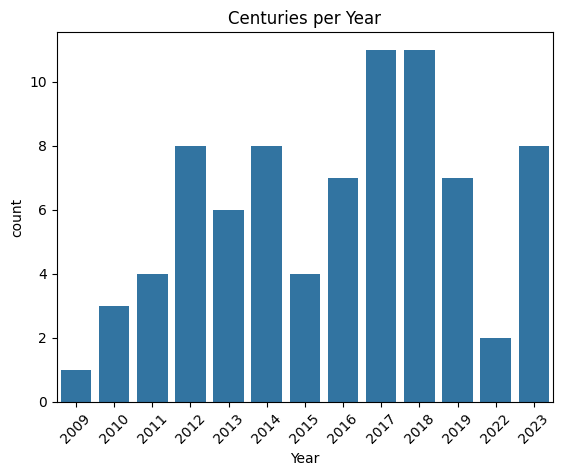

In [4]:

# centuries per year
sns.countplot(x='Year', data=df)
plt.title('Centuries per Year')
plt.xticks(rotation=45)
plt.show()

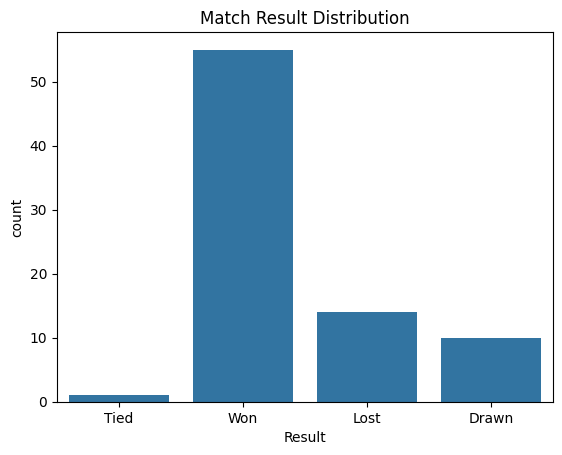

In [5]:
# Result Distribution
sns.countplot(x='Result', data=df)
plt.title('Match Result Distribution')
plt.show()

In [6]:
df['Against'] = df['Against'].str.strip()


australia_matches = df[df['Against'] == 'Australia']
print(australia_matches)

average_run_australia = australia_matches['Runs'].mean()
print(average_run_australia)

south_match = df[df['Against'] == 'South Africa']
print(south_match)


    No.  Runs    Against  Position  Innings  \
2     3   118  Australia         3        2   
8     9   116  Australia         6        2   
16   17   107  Australia         5        2   
19   20   100  Australia         3        2   
20   21   115  Australia         3        2   
27   28   115  Australia         4        2   
28   29   141  Australia         4        4   
29   30   169  Australia         4        2   
30   31   147  Australia         4        2   
34   35   117  Australia         3        1   
35   36   106  Australia         3        2   
62   63   123  Australia         4        2   
63   64   104  Australia         3        2   
64   65   116  Australia         3        1   
65   66   123  Australia         3        2   
74   75   186  Australia         4        2   

                                           Venue Ground Result  Year  Month  \
2               APCA-VDCA Stadium, Visakhapatnam   Home    Won  2010     10   
8                         Adeaide Oval, Ad

In [7]:
for x in df.columns[1:]:
    print(x)
    print(df[x].unique())

Runs
[107 102 118 105 100 112 117 116 133 108 183 106 128 103 115 119 123 136
 127 139 141 169 147 138 200 211 154 167 235 122 204 111 131 110 121 113
 104 213 243 153 160 129 149 140 157 120 114 254 166 186 101]
Against
['Sri Lanka' 'Bangladesh' 'Australia' 'New Zealand' 'England'
 'West Indies' 'Pakistan' 'Zimbabwe' 'South Africa' 'Afghanistan']
Position
[4 3 6 5 2]
Innings
[2 1 4 3]
Venue
['Eden Gardens, Kolkata' 'Sher-e-Bangla Cricket Stadium, Dhaka'
 'APCA-VDCA Stadium, Visakhapatnam' 'Nehru Stadium, Guwahati'
 'Sophia Gardens, Cardiff' 'Feroz Shah Kotla Ground, Delhi'
 'Adeaide Oval, Adelaide' 'Bellerive Oval, Hobart'
 'MRIC Stadium, Hambantota' 'R. Premadasa Stadium, Colombo'
 'M. Chinnaswamy Stadium, Bangalore'
 'Vidarbha Cricket Association Stadium, Nagpur'
 'M. A. Chidambaram Stadium, Chennai' "Queen's Park Oval, Port of Spain"
 'Harare Sports Club, Harare' 'Sawai Mansingh Stadium, Jaipur'
 'VCA Stadium, Nagpur' 'Wanderers Stadium, Johannesburg'
 'McLean Park, Napier' 'Basin 

In [8]:
mean_runs_by_country = df.groupby('Against')['Runs'].mean().reset_index()

# descending order
# mean_runs_by_country = mean_runs_by_country.sort_values(by='Runs', ascending=False)
print(mean_runs_by_country)

        Against        Runs
0   Afghanistan  122.000000
1     Australia  125.187500
2    Bangladesh  127.714286
3       England  137.250000
4   New Zealand  128.000000
5      Pakistan  137.333333
6  South Africa  145.750000
7     Sri Lanka  133.800000
8   West Indies  129.583333
9      Zimbabwe  115.000000


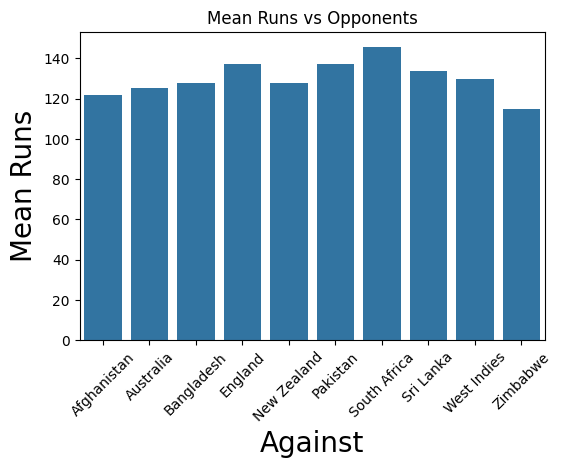

In [9]:
# Create a bar plot without showing mean runs 

plt.figure(figsize=(6, 4))

sns.barplot(x="Against", y="Runs", data=mean_runs_by_country)
plt.title("Mean Runs vs Opponents")
plt.ylabel("Mean Runs").set_fontsize(20)
plt.xlabel("Against").set_fontsize(20)
plt.xticks(rotation=45) 
plt.show()

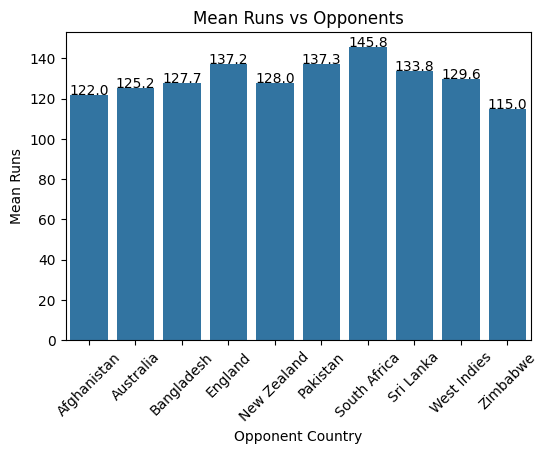

In [10]:
# Create a bar plot to visualize the data with their respected mean runs
plt.figure(figsize=( 6, 4))
ax = sns.barplot(x='Against', y='Runs', data=mean_runs_by_country)

# Add title and labels
plt.title("Mean Runs vs Opponents")
plt.ylabel("Mean Runs")
plt.xlabel("Opponent Country")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Use bar_label to display the mean runs above each bar
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(), 1)}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 3), textcoords='offset points')

# Show the plot
plt.show()

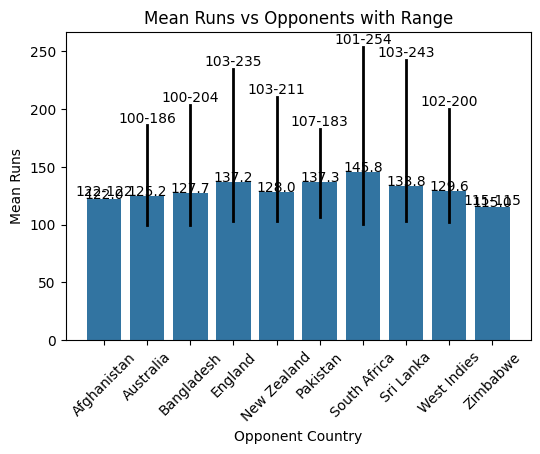

In [11]:
# Calculate mean runs and min/max runs per opponent
mean_runs_by_country = df.groupby('Against')['Runs'].agg(['mean', 'min', 'max']).reset_index()

# Create a bar plot to visualize the mean runs with the range (min, max)
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Against', y='mean', data=mean_runs_by_country)

# Add title and labels
plt.title("Mean Runs vs Opponents with Range")
plt.ylabel("Mean Runs")
plt.xlabel("Opponent Country")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add the range bars (min and max)
for i, row in mean_runs_by_country.iterrows():
    ax.plot([i, i], [row['min'], row['max']], color='black', linewidth=2)
    
    # Optionally, annotate the range
    ax.annotate(f"{int(row['min'])}-{int(row['max'])}", 
                (i, row['max']), 
                ha='center', va='bottom', 
                fontsize=10, color='black')

# Use bar_label to display the mean runs above each bar
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(), 1)}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 3), textcoords='offset points')


# Show the plot
plt.show()
